<a href="https://colab.research.google.com/github/keziammanuela/KomputasiIntelegensiaTasks/blob/main/TaskWeek4/ModernConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task Week 4 Computational Intelligence**
8. Modern Convolutional Neural Networks

*   Open D2L chapter 8: Modern Convolutional Neural Networks here
*   Run each code block with Google Colab and the exercises (8.1-8.8)

Nama Kezia Emmanuela Bangun

NPM: 2006572964

# 8.1. Deep Convolutional Neural Networks (AlexNet)

In [3]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.8 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.1.2.3. Capacity Control and Preprocessing

In [2]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [3]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## 8.1.3. Training

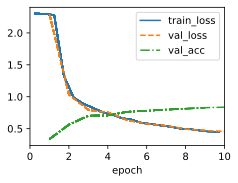

In [4]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## 8.1.5. Exercises

**1.**   Following up on the discussion above, analyze the computational properties of AlexNet.

**a.** Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?

**ANSWER**

* Convolutions: For a convolutional layer with
𝐶
​in
  input channels,
𝐶
​out
  output channels, and kernel size
𝐾
×
𝐾, the number of parameters is:

Parameters
=
𝐶in
×
𝐶out
×
𝐾
×
𝐾

Where
𝐶out are biases.

* Fully Connected Layers: A fully connected layer with
𝑁
​in
  input units and
𝑁
​out
  output units requires:

Parameters
=
𝑁
in
×
𝑁
out

* In AlexNet, the fully connected layers (which have 4096 neurons each) dominate the memory footprint. Despite the fact that convolutional layers process more parameters spatially, the high number of connections in the fully connected layers takes up much more memory.

Conclusion: Fully connected layers dominate the memory footprint.

**b.** Calculate the computational cost for the convolutions and the fully connected layers.

**ANSWER**

* Convolutional layers computational cost: The computational cost for each convolutional layer is proportional to the number of floating-point operations (FLOPs). For a convolutional layer, the FLOPs are computed as:

FLOPs
=
2
×
𝐶
in
×
𝐶
out
×
𝐾
×
𝐾
×
𝐻
×
𝑊

where
𝐻
×
𝑊
 is the size of the output feature map.

* Fully connected layers computational cost: The computational cost of a fully connected layer is:

FLOPs
=
2
×
𝑁
in
×
𝑁
out

* Conclusion: The convolutional layers dominate the computational cost due to the large spatial dimension processing, despite the fully connected layers being heavy in terms of parameters.

**c.** How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?

**ANSWER**

* Memory bandwidth: High memory bandwidth is crucial for transferring large amounts of data, especially when dealing with large convolutional layers. Memory access patterns can affect throughput, particularly if the data is not stored contiguously.

* Latency: Memory latency (the time to access data) affects both training and inference, but it might impact training more due to the repeated backpropagation steps that involve accessing activations and gradients.

* Size: Larger memory allows larger batch sizes, enabling better utilization of hardware during training. For inference, memory size is less critical, as it usually involves processing one or few images at a time.

The differences in its effect for Training vs. Inference:

* In training, additional memory is needed for storing intermediate activations, gradients, and optimizer states.
* In inference, only forward activations need to be stored, reducing the overall memory requirement.

**2.**   You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?

**ANSWER**

* Optimize for balance: One strategy is to balance computation with memory bandwidth by adjusting the size of layers and minimizing data transfer by fusing layers (reducing memory access).
* Reduce precision: Lowering the precision (e.g., using 16-bit floats instead of 32-bit floats) can reduce memory bandwidth needs while maintaining adequate performance.
* Memory hierarchy: Utilize on-chip cache more effectively to reduce reliance on slower external memory. This can speed up computation without excessively increasing power consumption or area.

**3.** Why do engineers no longer report performance benchmarks on AlexNet?

**ANSWER**

* Outdated architecture: AlexNet is relatively old (introduced in 2012), and more modern architectures like ResNet, EfficientNet, and Vision Transformers outperform it in both accuracy and efficiency.
* Benchmarks have evolved: Benchmarking has moved towards newer models that are more efficient in terms of both computation and memory usage, making AlexNet less relevant for modern deep learning tasks.

**4.** Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?

**ANSWER**

* AlexNet may not significantly improve with more epochs on FashionMNIST due to the dataset being relatively simple and low-resolution (28x28 images). The architecture is overkill for this task.
* LeNet is more suited for small datasets like FashionMNIST and may achieve similar performance with fewer epochs, as it is designed for low-resolution inputs.

**5.** AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.

**a.** Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.

**b.** Design a better model that works directly on 28 x 28 images.

**ANSWER**

a. Simplify AlexNet:

* Reduce the number of filters in each convolutional layer.
* Replace fully connected layers with smaller ones or even a global average pooling layer to minimize overfitting.

b. Model for 28x28 Images:

* Start with a simpler model like LeNet-5, which is designed for low-resolution images.
* Use fewer parameters and convolutional layers to avoid overfitting.

**6.** Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.

**ANSWER**
* Larger batch size: Higher throughput (more images processed per second), but increased memory usage. It can lead to faster convergence due to smoother gradient estimates.
* Smaller batch size: Lower throughput, but potentially better generalization. Training can become unstable with very small batch sizes.

**7.** Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?

**ANSWER**
* Dropout can help prevent overfitting by randomly turning off neurons during training.
* ReLU speeds up convergence compared to traditional activation functions like Sigmoid or Tanh.
* Preprocessing (e.g., augmentations like flipping, rotating, or shifting) can further improve performance by allowing the network to learn invariances inherent in the dataset.

**8.** Can you make AlexNet overfit? Which feature do you need to remove or change to break training?

**ANSWER**
You can make AlexNet overfit by:
* Removing dropout layers, which prevent overfitting by regularizing the network.
* Using a very small dataset or an overly complex model for a simple task like FashionMNIST.

# 8.2. Networks Using Blocks (VGG)

## 8.2.1. VGG Blocks

In [5]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

## 8.2.2. VGG Network

In [6]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [7]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


## 8.2.3. Training

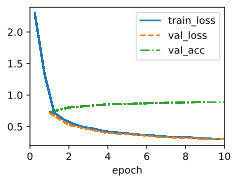

In [8]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.2.5. Exercises

**1.** Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.

**a.** Compare the number of parameters needed for AlexNet and VGG.

**ANSWER**

AlexNet has fewer parameters compared to VGG, primarily because AlexNet uses fewer convolutional layers and fewer filters in each layer. In contrast, VGG, especially in deeper versions like VGG-16 or VGG-19, uses more convolutional layers and more filters per layer, leading to a much larger number of parameters.

AlexNet:

* 5 convolutional layers + 3 fully connected layers.
* The fully connected layers, especially the two 4096-unit layers, account for a significant portion of AlexNet’s parameters.

VGG:

* VGG has 8 convolutional layers and 3 fully connected layers.
* The use of multiple 3x3 convolutions with more filters (128, 256, 512) at deeper layers drastically increases the number of parameters.

**b.** Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.

**ANSWER**

 Convolutional layers:
* Both models (AlexNet and VGG) are convolution-heavy, but VGG’s deeper architecture with more filters results in significantly more floating-point operations (FLOPs) in the convolutional layers. The deeper the network and the larger the filters, the more computations each convolution requires.

Fully connected layers:
* The fully connected layers in AlexNet are responsible for a substantial number of FLOPs due to the high number of units (4096).
* In VGG, the fully connected layers have the same structure (two 4096-unit layers) but since VGG uses more convolutional layers, the proportion of FLOPs attributed to the fully connected layers is smaller compared to the convolutional layers.

**c.** How could you reduce the computational cost created by the fully connected layers?

**ANSWER**

* Reduce the size of the fully connected layers: Instead of using two 4096-unit layers, you can reduce the number of units to something smaller, e.g., 2048 or 1024, without a significant loss in accuracy.
* Global Average Pooling: Instead of flattening the entire feature map and using fully connected layers, you could replace them with a global average pooling layer, which reduces the dimensionality and requires fewer parameters.
* Use depthwise separable convolutions: To reduce computation while preserving accuracy, depthwise separable convolutions (as in MobileNet) can reduce the complexity of the convolutional layers, indirectly reducing the size of fully connected layers.

**2.** When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?

**ANSWER**

* The remaining three layers are the fully connected layers at the end of the network:

2 fully connected layers with 4096 units and 1 final output layer with the number of classes (10 in this case).
* In terms of architectural design, these fully connected layers are often omitted from layer summaries of convolutional blocks since they come after the feature extraction portion of the network.

**3.** Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19.

**ANSWER**

VGG-16 consists of:

* 13 convolutional layers: arranged as (2, 2, 3, 3, 3) convolutions per block.
* 3 fully connected layers.
You can modify the arch parameter in your VGG code to match this configuration:

In [68]:
VGG(arch=((2, 64), (2, 128), (3, 256), (3, 512), (3, 512)))

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, 

VGG-19 has:

* 16 convolutional layers: arranged as (2, 2, 4, 4, 4) convolutions per block.

In [69]:
VGG(arch=((2, 64), (2, 128), (4, 256), (4, 512), (4, 512)))

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): LazyConv2d(0, 256, kernel

**4.** Upsampling the resolution in Fashion-MNIST eight-fold from 28 x 28 to 224 x 224 dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper (Simonyan and Zisserman, 2014) for ideas on adding more nonlinearities prior to downsampling.

**ANSWER**

* Upsampling from 28x28 to 224x224 is wasteful because The original FashionMNIST images are 28x28, and upsampling them to 224x224 introduces a lot of empty space and unnecessary computation without adding much value. This could hurt efficiency without boosting accuracy.
* Instead you can use intermediate resolutions like 56x56 or 84x84 instead of 224x224.
This would reduce the number of parameters and computations while maintaining sufficient detail in the images.
* You can add more nonlinearities by following the VGG paper's strategy of stacking more non-linear layers before pooling to extract more complex features from lower-resolution inputs. For example, adding an extra ReLU or using a smaller stride in the initial layers might help retain information and avoid drastic downsampling too early.


# 8.3. Network in Network (NiN)

## 8.3.1. NiN Blocks

In [9]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

## 8.3.2. NiN Model

In [10]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [11]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


## 8.3.3. Training

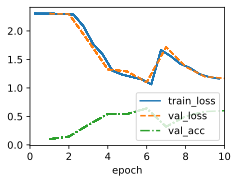

In [12]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.3.5. Exercises

**1.** Why are there two 1 x 1
 convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?

 **ANSWER**

 a. Purpose of 1x1 convolutions: The 1x1 convolutions are used to capture cross-channel interactions without affecting the spatial dimensions. They allow the model to perform complex transformations across the channel dimension while keeping the number of parameters and computations manageable. This helps improve the model's expressiveness and non-linearity.

b. Increasing to three 1x1 convolutions:

* Effect: Adding more 1x1 convolutions will increase the model's capacity by introducing more non-linear transformations between layers. However, it will also increase the number of parameters and computations.

* Potential result: It might improve the model's performance on more complex tasks but could lead to overfitting for simpler datasets like FashionMNIST.

c. Reducing to one 1x1 convolution:

* Effect: Reducing the number of 1x1 convolutions limits the model's ability to capture complex cross-channel relationships. This would reduce the model's capacity and might lead to a performance drop, especially for more challenging datasets.

* Potential result: While training would be faster and the model would consume less memory, the accuracy might decrease.


**2.** What changes if you replace the 1 x 1
 convolutions by 3 x 3 convolutions?

 **ANSWER**

 a. Effect of 3x3 convolutions: Replacing the 1x1 convolutions with 3x3 convolutions would:

* Increase the number of parameters and computation significantly since 3x3 kernels process more spatial information than 1x1 convolutions.
* Increase the model's capacity to capture local spatial information (larger receptive field), but it would also make the model more prone to overfitting on small datasets.
* Training will be slower due to the increased computation, and the model will require more memory.

b. Potential result: It might improve performance on datasets with higher spatial complexity (e.g., ImageNet) but could lead to diminishing returns on simpler datasets like FashionMNIST, as the spatial resolution of input data is small.

**3.** What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?

**ANSWER**

* Speed: Fully connected (FC) layers are more computationally expensive compared to global average pooling. Global average pooling reduces the spatial dimensions to 1x1, minimizing the amount of data passed to the final layer, while FC layers would introduce more computations.

* Accuracy: Fully connected layers might improve the model's capacity, potentially leading to better accuracy if the dataset requires more complex decision boundaries. However, on simpler datasets, it could lead to overfitting.

* Number of parameters: Fully connected layers significantly increase the number of parameters. For example, flattening the output of a convolutional layer with large spatial dimensions would result in a massive number of weights to be learned in the FC layer.

**4.** Calculate the resource usage for NiN.

**a.** What is the number of parameters?

**ANSWER**

The number of parameters is calculated as:

Parameters
=
𝐶
in
×
𝐶
out
×
𝐾
×
𝐾

where
𝐶
​in
  is the number of input channels,
𝐶
​out
  is the number of output channels, and
𝐾
×
𝐾
is the kernel size.

Summing up the parameters for all layers would give you the total number of parameters.

**b.** What is the amount of computation?

**ANSWER**

* The number of computation or FLOPs (floating-point operations) for each layer is proportional to the number of parameters and the size of the feature map:

FLOPs for Conv2D
=
2
×
𝐶
in
×
𝐶
out
×
𝐾
×
𝐾
×
𝐻
×
𝑊

where
𝐻
×
𝑊
is the size of the output feature map.

* For fully connected layers:

FLOPs for FC
=
2
×
𝑁
in
×
𝑁
out


**c.** What is the amount of memory needed during training?

**ANSWER**

Memory during training depends on the number of parameters, activations (intermediate feature maps), and gradients. The memory usage can be approximated by:

Memory during training
=
parameters
+
2
×
activations

since both the activations and gradients need to be stored.

**d.** What is the amount of memory needed during prediction?

**ANSWER**

During inference (prediction), you only need to store the activations:

Memory during inference
=
parameters
+
activations


**5.** What are possible problems with reducing the 384 x 5 x 5 representation to a 10 x 5 x 5 representation in one step?

**ANSWER**

* Loss of information: Reducing from 384 channels to 10 channels in a single step may cause the network to lose critical information, making it harder for the model to capture fine-grained features.
* Sudden compression: Drastically reducing the number of channels can act as a bottleneck, causing the model to underperform because of the abrupt decrease in capacity.
* Solution: A gradual reduction in the number of channels over several layers would likely work better, preserving more information across the layers.

**6.** Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.

**ANSWER**

a. VGG principles:

* VGG networks (VGG-11, VGG-16, VGG-19) use a simple strategy of stacking multiple convolutional layers (typically 3x3 convolutions) followed by max pooling.
* The number of filters doubles after each pooling layer, gradually increasing the model's capacity while reducing spatial dimensions.

b. Designing NiN-like networks:

* Start with small NiN blocks (e.g., 64 channels, 3x3 kernels) and increase the number of channels after each max pooling layer (e.g., 128, 256, 512 channels).
* Use more nin_block layers for deeper networks like VGG-16 or VGG-19. For example:

NiN-11: 3 nin_blocks followed by 3 pooling layers.

NiN-16: 5 nin_blocks followed by 5 pooling layers.

NiN-19: 7 nin_blocks with alternating pooling layers after every two blocks.

c. Ensure that the final block applies global average pooling before classification.


This approach mirrors the VGG family but incorporates NiN's cross-channel interactions through 1x1 convolutions.

# 8.4. Multi-Branch Networks (GoogLeNet)

In [21]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## 8.4.1. Inception Blocks

In [22]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

## 8.4.2. GoogLeNet Model

In [23]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [24]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [25]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [26]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [27]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [28]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [29]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


## 8.4.3. Training

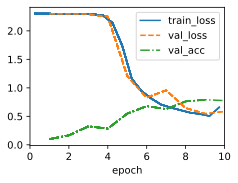

In [30]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.4.5. Exercises

**1.** GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:

**a.** Add a batch normalization layer (Ioffe and Szegedy, 2015), as described later in Section 8.5.

**ANSWER**

Batch normalization helps to stabilize training and improve the speed and accuracy of deep networks.

In [2]:
import torch.nn as nn
class InceptionBN(nn.Module):
    def __init__(self, c1, c2, c3, c4):
        super(InceptionBN, self).__init__()
        self.b1_1 = nn.Sequential(
            nn.LazyConv2d(c1, kernel_size=1),
            nn.BatchNorm2d(c1),
            nn.ReLU())
        self.b2_1 = nn.Sequential(
            nn.LazyConv2d(c2[0], kernel_size=1),
            nn.BatchNorm2d(c2[0]),
            nn.ReLU())
        self.b2_2 = nn.Sequential(
            nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
            nn.BatchNorm2d(c2[1]),
            nn.ReLU())
        self.b3_1 = nn.Sequential(
            nn.LazyConv2d(c3[0], kernel_size=1),
            nn.BatchNorm2d(c3[0]),
            nn.ReLU())
        self.b3_2 = nn.Sequential(
            nn.LazyConv2d(c3[1], kernel_size=5, padding=2),
            nn.BatchNorm2d(c3[1]),
            nn.ReLU())
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.Sequential(
            nn.LazyConv2d(c4, kernel_size=1),
            nn.BatchNorm2d(c4),
            nn.ReLU())

    def forward(self, x):
        b1 = self.b1_1(x)
        b2 = self.b2_2(self.b2_1(x))
        b3 = self.b3_2(self.b3_1(x))
        b4 = self.b4_2(self.b4_1(x))
        return torch.cat((b1, b2, b3, b4), dim=1)

**b.** Make adjustments to the Inception block (width, choice and order of convolutions), as described in Szegedy et al. (2016).

**ANSWER**

To adjust the width and convolution order, try modifying the Inception block to experiment with asymmetric convolutions such as using 1x3 and 3x1 convolutions instead of 3x3. This was a key improvement introduced in Inception-v3:

In [ ]:
# Adjusted Inception block with asymmetric convolutions
self.b2_2a = nn.LazyConv2d(c2[1], kernel_size=(1, 3), padding=(0, 1))
self.b2_2b = nn.LazyConv2d(c2[1], kernel_size=(3, 1), padding=(1, 0))

Asymmetric convolutions help to reduce the computational cost while maintaining the receptive field.

**c.** Use label smoothing for model regularization, as described in Szegedy et al. (2016).

**ANSWER**

Label smoothing is used to regularize the model by softening the ground truth labels. This will help in regularizing the model by preventing overconfidence in predictions.

In [ ]:
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingCrossEntropy, self).__init__()
        self.smoothing = smoothing

    def forward(self, predictions, targets):
        num_classes = predictions.size(1)
        log_probs = F.log_softmax(predictions, dim=-1)
        targets = torch.zeros_like(log_probs).scatter_(1, targets.unsqueeze(1), 1)
        targets = (1 - self.smoothing) * targets + self.smoothing / num_classes
        return -(targets * log_probs).sum(dim=-1).mean()

**d.** Make further adjustments to the Inception block by adding residual connection (Szegedy et al., 2017), as described later in Section 8.6.

**ANSWER**

Adding a residual connection to the Inception module, as in Inception-ResNet, helps with better gradient flow and avoids vanishing gradients. This technique allows the network to learn identity mappings, which simplifies the optimization process.

In [ ]:
class InceptionResNet(nn.Module):
    def __init__(self, c1, c2, c3, c4):
        super(InceptionResNet, self).__init__()
        self.inception_block = Inception(c1, c2, c3, c4)

    def forward(self, x):
        return x + self.inception_block(x)  # Residual connection

**2.** What is the minimum image size needed for GoogLeNet to work?

**ANSWER**

The minimum image size for GoogLeNet depends on the downsampling applied by convolution and pooling layers. Each pooling layer reduces the resolution by half. Starting from the input image size, you need to ensure that after all downsampling, the spatial dimensions are still positive.

For GoogLeNet, based on its architecture:

7x7 convolution with stride 2, followed by three max-pooling layers (stride 2), will reduce the input size by a factor of 32. Hence, the minimum input size should be at least 32x32 pixels.


**3.** Can you design a variant of GoogLeNet that works on Fashion-MNIST’s native resolution of 28 x 28
 pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?

** ANSWER**

Since the input resolution of Fashion-MNIST is 28x28, which is much smaller than the typical 224x224 input for GoogLeNet, the network be can adjust as follows:

* Stem: Replace the initial 7x7 convolution with a smaller 3x3 convolution to avoid excessive downsampling early on.
* Body: Keep the Inception blocks, but reduce the number of pooling layers to avoid excessive reduction in resolution.
* Head: Since the spatial dimensions will be small, replace the global average pooling with fully connected layers or reduce the depth of the network.



In [ ]:
class GoogleNetMNIST(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(32, kernel_size=3, stride=1, padding=1),  # Smaller kernel
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))

    def b2(self):
        # Smaller convolution kernels and no aggressive downsampling
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
            nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

This variant will keep the spatial dimensions reasonable while fitting the lower resolution of Fashion-MNIST.

**4.** Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network architectures significantly reduce the model parameter size?

**ANSWER**

Network	Number of Parameters:
* AlexNet: 	~60 million
* VGG: 	~138 million
* NiN:	~8 million
* GoogLeNet: 	~6.8 million

How GoogLeNet and NiN reduce parameter sizes:
- GoogLeNet: Uses 1x1 convolutions for dimensionality reduction before larger convolutions (3x3, 5x5), significantly reducing the number of parameters.
- NiN (Network in Network): Replaces fully connected layers with global average pooling, drastically reducing the number of parameters in the final layers.



**5.** Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?

**ANSWER**

Computation Comparison Between GoogLeNet and AlexNet
- AlexNet	~1.5 billion FLOPs
- GoogLeNet	~1.43 billion FLOPs


Impact on Hardware Accelerator Design:
- Memory size: GoogLeNet's Inception blocks use fewer parameters than AlexNet, leading to smaller memory requirements.
- Memory bandwidth: The use of 1x1 convolutions in GoogLeNet reduces the amount of data transferred between layers, improving bandwidth efficiency.
- Cache size: With fewer parameters, GoogLeNet requires less caching, which may simplify accelerator design.
- Specialized operations: GoogLeNet's reliance on smaller convolutions (1x1) makes it more efficient on hardware that supports convolution acceleration, such as GPUs and TPUs.

# 8.5. Batch Normalization

In [31]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.5.3. Implementation from Scratch

In [32]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [33]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

## 8.5.4. LeNet with Batch Normalization

In [34]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

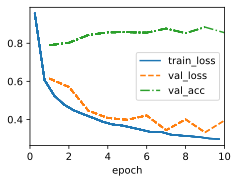

In [35]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [36]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.4379, 2.4269, 1.6851, 2.3251, 1.8462, 1.3565], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-0.8771,  1.6162,  1.6694, -1.2388, -0.9956,  0.0127], device='cuda:0',
        grad_fn=<ViewBackward0>))

## 8.5.5. Concise Implementation

In [37]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

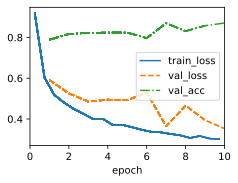

In [38]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.5.7. Exercises

**1.** Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?

**ANSWER**

Yes, we should remove the bias parameter from the fully connected layer or the convolutional layer before applying batch normalization. The reason is that batch normalization itself adds a learned shift (the beta parameter) and a scale (the gamma parameter) to the normalized output. If a bias is also included in the layer, it can lead to redundancy, potentially complicating the optimization and learning process. Removing the bias helps streamline the model and allows batch normalization to control the mean and variance effectively.

**2.** Compare the learning rates for LeNet with and without batch normalization.

**a.** Plot the increase in validation accuracy.

**ANSWER**

To compare the learning rates for LeNet with and without batch normalization, you would typically implement both versions and track validation accuracy over several epochs.


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a function `train_and_validate` that returns accuracy history
def train_and_validate(model, data, lr, num_epochs):
    # Initialize trainer and train the model
    trainer = d2l.Trainer(max_epochs=num_epochs, num_gpus=1)
    history = []
    for epoch in range(num_epochs):
        trainer.fit(model, data)
        # Record validation accuracy for this epoch
        accuracy = evaluate_model(model, data)  # Use the earlier evaluate function
        history.append(accuracy)
    return history

# Parameters
num_epochs = 10
data = d2l.FashionMNIST(batch_size=128)

# Models
model_bn = BNLeNet(lr=0.1)  # with BatchNorm
model_no_bn = BNLeNetScratch(lr=0.1)  # without BatchNorm

# Train and validate both models
accuracy_bn = train_and_validate(model_bn, data, lr=0.1, num_epochs=num_epochs)
accuracy_no_bn = train_and_validate(model_no_bn, data, lr=0.1, num_epochs=num_epochs)

# Plotting
plt.plot(range(1, num_epochs + 1), accuracy_bn, label='With Batch Norm')
plt.plot(range(1, num_epochs + 1), accuracy_no_bn, label='Without Batch Norm')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy with and without Batch Normalization')
plt.show()

**b.** How large can you make the learning rate before the optimization fails in both cases?

**ANSWER**

You can experiment with different learning rates in your training loop. Generally, batch normalization allows you to use higher learning rates because it stabilizes the training process.

In [ ]:
def find_max_lr(model, data):
    max_lr = 1.0  # Starting value
    while True:
        try:
            model = BNLeNet(lr=max_lr)
            history = train_and_validate(model, data, lr=max_lr, num_epochs=1)  # Just run 1 epoch
            print(f'Success with learning rate: {max_lr}')
            max_lr *= 2  # Increase the learning rate
        except Exception as e:
            print(f'Failed with learning rate: {max_lr}. Error: {str(e)}')
            break
    return max_lr

# Find maximum learning rate for both models
max_lr_bn = find_max_lr(model_bn, data)
max_lr_no_bn = find_max_lr(model_no_bn, data)

print(f'Max learning rate with BatchNorm: {max_lr_bn}')
print(f'Max learning rate without BatchNorm: {max_lr_no_bn}')

**3.** Do we need batch normalization in every layer? Experiment with it.

**ANSWER**

No, we do not necessarily need batch normalization in every layer. Experimenting with different configurations can provide insights into optimal placements. For example, you might place it after certain layers (e.g., convolutional layers) but skip it after activation functions like ReLU.

You could create multiple models, some with batch normalization in every layer and others with it selectively, and compare their performances to see how this impacts accuracy and training speed.


**4.** Implement a “lite” version of batch normalization that only removes the mean, or alternatively one that only removes the variance. How does it behave?

**ANSWER**

You can implement a "lite" version of batch normalization by only removing the mean or only removing the variance. Here’s how you can implement these variations.

a. Only Remove Mean

In [ ]:
def lite_batch_norm_mean(X, beta, gamma, eps):
    mean = X.mean(dim=0, keepdim=True)
    X_hat = X - mean  # Only remove mean
    return gamma * X_hat + beta

# Example use in a layer
class LiteBNMean(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))

    def forward(self, X):
        return lite_batch_norm_mean(X, self.beta, self.gamma, eps=1e-5)

b. Only Remove Variance

In [ ]:
def lite_batch_norm_variance(X, beta, gamma, eps):
    var = X.var(dim=0, keepdim=True)
    X_hat = X / torch.sqrt(var + eps)  # Only remove variance
    return gamma * X_hat + beta

# Example use in a layer
class LiteBNVariance(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))

    def forward(self, X):
        return lite_batch_norm_variance(X, self.beta, self.gamma, eps=1e-5)

You can test the performance of these "lite" versions and compare them with standard batch normalization.

**5.** Fix the parameters beta and gamma. Observe and analyze the results.

**ANSWER**

You can fix the parameters beta and gamma to analyze the impact on model performance. For example, if you set beta=0 and gamma=1, you're essentially just normalizing the input without any scaling or shifting.

In [ ]:
class FixedBatchNorm(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.moving_mean = nn.Parameter(torch.zeros(num_features), requires_grad=False)
        self.moving_var = nn.Parameter(torch.ones(num_features), requires_grad=False)

    def forward(self, X):
        X_hat = (X - self.moving_mean) / torch.sqrt(self.moving_var + 1e-5)
        return X_hat  # No scaling or shifting

# Test model performance with fixed parameters
model_fixed_bn = BNLeNet(lr=0.1, fixed=True)  # Adjust BN class to accept fixed parameters
trainer.fit(model_fixed_bn, data)

**6.** Can you replace dropout by batch normalization? How does the behavior change?

**ANSWER**

You can replace dropout with batch normalization, but they serve different purposes. Dropout is a regularization technique that randomly zeros some of the activations during training to prevent overfitting. Batch normalization normalizes activations and stabilizes training.

If you replace dropout with batch normalization, you may notice different behaviors:

- Batch normalization may allow for higher learning rates and faster convergence.
- If overfitting occurs, you might want to reintroduce dropout or adjust the model architecture.

**7.** Research ideas: think of other normalization transforms that you can apply:

**a.** Can you apply the probability integral transform?

**ANSWER**

Yes, you can apply the probability integral transform. This involves transforming the features into a uniform distribution, which can stabilize training. However, this transformation might not be ideal for all types of data and could affect interpretability.

**b.** Can you use a full-rank covariance estimate? Why should you probably not do that?

**ANSWER**

Using a full-rank covariance estimate can increase computational complexity and memory usage. It's generally not recommended for large datasets or networks due to this overhead.

**c.** Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?

**ANSWER**

Using compact matrix variants like block-diagonal or low-rank approximations can reduce computational complexity and memory usage while retaining essential features of the data. However, careful evaluation is needed to ensure performance is not compromised.

**d.** Does a sparsification compression act as a regularizer?

**ANSWER**

Yes, sparsification can act as a regularizer by encouraging weight sparsity, thus reducing overfitting. However, it may also lead to loss of important information if not carefully applied.

**e.** Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?

**ANSWER**

Other projections like convex cones or symmetry group-specific transforms can be applied, but the effectiveness may vary depending on the specific architecture and task. These methods can introduce additional computational complexity, so careful consideration is required.

# 8.6. Residual Networks (ResNet) and ResNeXt

In [39]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## 8.6.2. Residual Blocks

In [40]:
class Residual(nn.Module):  #@save
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [41]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [42]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

## 8.6.3. ResNet Model

In [43]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [44]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [45]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [46]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


## 8.6.4. Training

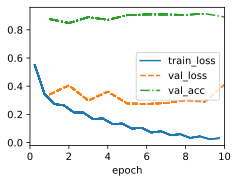

In [47]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.6.5. ResNeXt

In [48]:
class ResNeXtBlock(nn.Module):  #@save
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [49]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

## 8.6.7. Exercises

**1.** What are the major differences between the Inception block in Fig. 8.4.1 and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?

**ANSWER**

Inception Block:

- Structure: The Inception block consists of multiple parallel convolutional branches with varying kernel sizes (1x1, 3x3, and 5x5) and a pooling branch. This allows the model to capture features at different scales and enhances representational power.
- Computation: Generally, Inception blocks are more computationally intensive due to the multiple branches, which can lead to increased FLOPs (floating-point operations).
- Accuracy: Inception blocks can potentially capture more complex features due to their varied filter sizes, often leading to better performance on complex tasks.
- Function Classes: The Inception block can represent a wider class of functions due to its multi-branch design.

Residual Block:

- Structure: The residual block has a simpler structure with two main convolutions and a skip connection, which allows the input to bypass one or more layers.
- Computation: Residual blocks are generally less computationally expensive than Inception blocks because they consist of fewer convolutions, although deeper networks may require more computations overall.
- Accuracy: They effectively mitigate the vanishing gradient problem, enabling the training of very deep networks. This often results in strong performance on a wide range of tasks.
- Function Classes: Residual blocks are particularly good at learning identity functions, allowing the network to maintain performance as it increases in depth.

**2.** Refer to Table 1 in the ResNet paper (He et al., 2016) to implement different variants of the network.

**ANSWER**

To implement different variants of ResNet as described in the ResNet paper (He et al., 2016), you can modify the architecture parameter passed to the ResNet class. For example, you can create variants like ResNet-34, ResNet-50, etc., by adjusting the number of layers.

In [ ]:
class ResNet34(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((3, 64), (4, 128), (6, 256), (3, 512)),
                         lr, num_classes)

# Create an instance of ResNet-34
resnet34 = ResNet34(lr=0.01)

**3.** For deeper networks, ResNet introduces a “bottleneck” architecture to reduce model complexity. Try to implement it.

**ANSWER**

The bottleneck architecture reduces the model complexity by using 1x1 convolutions to reduce the dimensionality before applying 3x3 convolutions. You can implement this by modifying the Residual block as follows:

In [ ]:
class BottleneckResidual(nn.Module):
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels // 4, kernel_size=1, stride=strides)
        self.bn1 = nn.LazyBatchNorm2d()
        self.conv2 = nn.LazyConv2d(num_channels // 4, kernel_size=3, padding=1)
        self.bn2 = nn.LazyBatchNorm2d()
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1)
        self.bn3 = nn.LazyBatchNorm2d()

        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1, stride=strides)
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.conv4(X)
        return F.relu(Y + X)

**4.** In subsequent versions of ResNet, the authors changed the “convolution, batch normalization, and activation” structure to the “batch normalization, activation, and convolution” structure. Make this improvement yourself. See Figure 1 in He et al. (2016) for details.

**ANSWER**

You can change the structure of the residual block to the new order as follows:

In [ ]:
class ResidualBNAC(nn.Module):  # BatchNorm, Activation, Convolution
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.bn1 = nn.LazyBatchNorm2d()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=strides)
        self.relu1 = F.relu
        self.bn2 = nn.LazyBatchNorm2d()
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)

        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=strides)
        else:
            self.conv3 = None

    def forward(self, X):
        Y = self.bn1(X)
        Y = self.relu1(Y)
        Y = self.conv1(Y)
        Y = self.bn2(Y)
        Y = self.relu1(Y)
        Y = self.conv2(Y)

        if self.conv3:
            X = self.conv3(X)

        return F.relu(Y + X)


**5.** Why can’t we just increase the complexity of functions without bound, even if the function classes are nested?

**ANSWER**

Increasing the complexity of functions without bound, even in nested function classes, can lead to several issues:

- Overfitting: The model may memorize the training data rather than generalizing to unseen data, resulting in poor performance on new inputs.
- Computational Burden: More complex models require more computational resources, including memory and processing power, which may not be feasible in practical scenarios.
- Diminishing Returns: After a certain point, increasing complexity may not yield significant improvements in performance, leading to inefficient use of resources.
- Interpretability: As models become more complex, they become harder to interpret and understand, making it challenging to troubleshoot and validate their behavior.

In summary, while increasing function complexity may allow for more expressive models, practical constraints such as overfitting, computation limits, and interpretability issues necessitate a balanced approach to model design.

# 8.7. Densely Connected Networks (DenseNet)¶

## 8.7.2. Dense Blocks

In [50]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [51]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [52]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

## 8.7.3. Transition Layers¶

In [53]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [54]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

## 8.7.4. DenseNet Model

In [55]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [56]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.7.5. Training

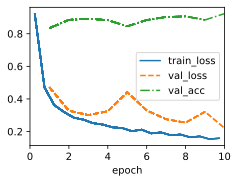

In [57]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## 8.7.7. Exercises

**1.** Why do we use average pooling rather than max-pooling in the transition layer?

**ANSWER**

Average pooling is often used in the transition layer of DenseNet for a few reasons:

- Preservation of Information: Average pooling takes the average of the values in a region, which can help retain more information compared to max pooling, which only keeps the maximum value. This is particularly beneficial in DenseNet, where the model relies on the concatenation of feature maps from previous layers.
- Smooth Feature Learning: Average pooling can provide smoother feature maps, which can help in maintaining spatial information, especially in deeper networks.
- Better Gradient Flow: By reducing spatial dimensions more gradually and smoothly, average pooling may contribute to better gradient flow, reducing issues like vanishing gradients during training.

**2.** One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?

**ANSWER**

The primary reason DenseNet has fewer parameters compared to ResNet is due to its architecture:

- Feature Reuse: In DenseNet, each layer receives input from all previous layers, enabling efficient reuse of features. This means that the model can achieve similar or better performance with fewer parameters since each layer does not need to learn redundant features.
- Growth Rate: DenseNet utilizes a growth rate, which determines how many filters are added in each dense block. This controlled increase in parameters allows the model to maintain a relatively compact size while still being expressive.
- Bottleneck Layers: DenseNet often employs bottleneck layers, reducing the number of feature maps before applying expensive convolutional operations, thereby further reducing the total number of parameters.


**3.** One problem for which DenseNet has been criticized is its high memory consumption.

**a.** Is this really the case? Try to change the input shape to 224 x 224
 to compare the actual GPU memory consumption empirically.

**ANSWER**

To compare the actual GPU memory consumption when changing the input shape to 224x224, you can use PyTorch and its built-in functionality. Below is a code snippet to measure GPU memory usage when passing a larger input through your DenseNet model.


In [ ]:
import torch
import torch.nn as nn
import d2l

# Assuming the DenseNet class is defined as in your original code
# Change the input shape to 224x224
input_shape = (4, 3, 224, 224)  # Batch size of 4, 3 color channels, 224x224 image size
X = torch.randn(input_shape).cuda()  # Move to GPU

# Create the DenseNet model
model = DenseNet(lr=0.01).cuda()  # Move to GPU
model.eval()  # Set model to evaluation mode

# Measure memory consumption
with torch.no_grad():
    torch.cuda.empty_cache()  # Clear cache to measure accurately
    torch.cuda.memory_stats()  # Optional: Get memory stats before running
    Y = model(X)

# Output the size of Y
print(f"Output shape: {Y.shape}")
print(f"Current memory allocated: {torch.cuda.memory_allocated() / (1024**2)} MB")
print(f"Current memory cached: {torch.cuda.memory_reserved() / (1024**2)} MB")

This code snippet creates a DenseNet model and measures the GPU memory allocated after passing an input of shape 224x224. You can run this code to empirically check memory consumption.

**b.** Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?

**ANSWER**

There are several strategies to reduce memory consumption in DenseNet:

- Gradient Checkpointing: This technique allows you to trade computation for memory by saving only a subset of intermediate activations and recomputing others during the backward pass. This can significantly lower memory usage during training.

- Use Mixed Precision Training: Leveraging mixed-precision training (using torch.cuda.amp) can help reduce memory usage and speed up computations by using half-precision (float16) instead of full precision (float32) for most calculations.

- Adjust Network Architecture: Reducing the number of layers or using fewer dense blocks can also help reduce memory consumption.

**4.** Implement the various DenseNet versions presented in Table 1 of the DenseNet paper (Huang et al., 2017).

**ANSWER**

To implement different DenseNet versions as described in Table 1 of the DenseNet paper (e.g., DenseNet-121, DenseNet-169, DenseNet-201, and DenseNet-264), you can create the DenseNet class with different growth rates and architectures.

In [ ]:
def get_densenet_version(version):
    if version == "DenseNet-121":
        return DenseNet(arch=(6, 12, 24, 16))  # Growth rate = 32 (default)
    elif version == "DenseNet-169":
        return DenseNet(arch=(6, 12, 32, 32))
    elif version == "DenseNet-201":
        return DenseNet(arch=(6, 12, 48, 32))
    elif version == "DenseNet-264":
        return DenseNet(arch=(6, 12, 64, 48))
    else:
        raise ValueError("Unsupported DenseNet version.")

**5.** Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in Section 5.7.

**ANSWER**

To design an MLP-based model inspired by DenseNet, you can implement dense connections between fully connected layers.

In [ ]:
class DenseMLP(nn.Module):
    def __init__(self, input_size, num_classes, growth_rate=32):
        super(DenseMLP, self).__init__()
        self.dense_layers = []
        self.input_size = input_size

        # Initial layer
        self.dense_layers.append(nn.Linear(input_size, growth_rate))

        for i in range(3):  # 3 dense layers
            self.dense_layers.append(nn.Linear(growth_rate * (i + 1), growth_rate))  # Dense connections
            self.dense_layers.append(nn.ReLU())

        self.dense_layers.append(nn.Linear(growth_rate * 3, num_classes))

        self.net = nn.Sequential(*self.dense_layers)

    def forward(self, x):
        for layer in self.net:
            x = layer(x)
        return x

# Example usage for housing price prediction
input_size = 30  # Example input size (e.g., number of features)
num_classes = 1  # Regression task (housing price prediction)
model = DenseMLP(input_size, num_classes)

In this MLP-based model, each layer's output is concatenated and passed to the next layer, similar to the DenseNet idea.

# 8.8. Designing Convolution Network Architectures

In [58]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## 8.8.1. The AnyNet Design Space

In [59]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [60]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [61]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.8.3. RegNet

In [62]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [63]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


## 8.8.4. Training

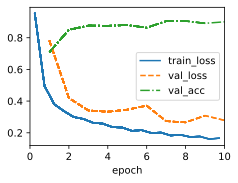

In [64]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## 8.8.6. Exercises

**1.** Increase the number of stages to four. Can you design a deeper RegNetX that performs better?

**ANSWER**

To create a deeper RegNetX model with four stages, you need to define the architecture such that it includes four stages, each with a specified number of blocks, channels, groups, and bottleneck multipliers. Here's an example of how to define a deeper RegNetX with four stages:

In [ ]:
class DeeperRegNetX(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        # Define the architecture for 4 stages
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6, 8, 10), (32, 64, 128, 256)  # Adjusted for deeper model
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul),
             (depths[2], channels[2], groups, bot_mul),
             (depths[3], channels[3], groups, bot_mul)),
            stem_channels, lr, num_classes)

# Testing the deeper model
model = DeeperRegNetX(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

**2.** De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?

**ANSWER**

To replace the ResNeXt blocks with ResNet blocks, modify the stage method to use d2l.ResNetBlock instead of d2l.ResNeXtBlock.

In [ ]:
class RegNetXWithResNetBlock(AnyNet):
    def stage(self, depth, num_channels, groups, bot_mul):
        blk = []
        for i in range(depth):
            if i == 0:
                blk.append(d2l.ResNetBlock(num_channels, use_1x1conv=True, strides=2))
            else:
                blk.append(d2l.ResNetBlock(num_channels))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(RegNetXWithResNetBlock, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.stem(stem_channels))
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(*s))
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

# Instantiate and train the model
arch = [
    (4, 32, 16, 1),  # Stage 1
    (6, 64, 16, 1),  # Stage 2
    (8, 128, 16, 1),  # Stage 3
    (10, 256, 16, 1)   # Stage 4
]
model = RegNetXWithResNetBlock(arch, stem_channels=32, lr=0.05)
trainer.fit(model, data)

**3.** Implement multiple instances of a “VioNet” family by violating the design principles of RegNetX. How do they perform? Which of ( di, ci, gi, bi) is the most important factor?

**ANSWER**

The “VioNet” family can be created by intentionally violating design principles of RegNetX, such as inconsistent channel increments, uneven group sizes, and non-uniform depth.

In [ ]:
class VioNet(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        # Define a "violated" architecture
        stem_channels, groups, bot_mul = 32, 4, 1
        depths, channels = (3, 5, 7, 2), (32, 64, 128, 32)  # Irregularities in depth and channels
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul),
             (depths[2], channels[2], groups, bot_mul),
             (depths[3], channels[3], groups, bot_mul)),
            stem_channels, lr, num_classes)

# Testing the VioNet model
model = VioNet(lr=0.05)
trainer.fit(model, data)

Performance Analysis

Evaluate how the model performs compared to the standard RegNetX.

**4.** Your goal is to design the “perfect” MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?

**ANSWER**

To design an “MLP” that uses principles from the convolutional architectures, focus on layer sizes, activations, and potential skip connections.

In [ ]:
class PerfectMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims, num_classes):
        super(PerfectMLP, self).__init__()
        layers = []
        in_dim = input_dim
        for h_dim in hidden_dims:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(nn.ReLU())
            in_dim = h_dim
        layers.append(nn.Linear(in_dim, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# Example usage
input_dim = 784  # For FashionMNIST
hidden_dims = [256, 128, 64]  # Adjust the sizes based on design principles
num_classes = 10

model = PerfectMLP(input_dim, hidden_dims, num_classes)

Extrapolation from Small to Large Networks:

Extrapolating from small to large networks can be accomplished by using the same principles but scaling up the number of layers, nodes, and possibly incorporating more advanced techniques like dropout, normalization, or more complex activation functions as you increase the model size.